## Load the necessary libraries

In [71]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

## Read data

In [49]:
raw_data = pd.read_csv("puzzle_train_dataset.csv", index_col="ids")
## Show the first elements of the dataframe
raw_data.head()

,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
ids,,,,,,,,,,,,,,,,,,,,,
810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,...,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,...,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN
a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,...,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,...,GW2VZ3dN3OGHSjQ6JkfqQw==,coa2oOrpjxnQl4iyM7dTpQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,...,sjJbkqJS7cXalHLBFA+EOQ==,xTrDMEf/Cnewxc1LO+pfbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0


## Exploratory data analysis

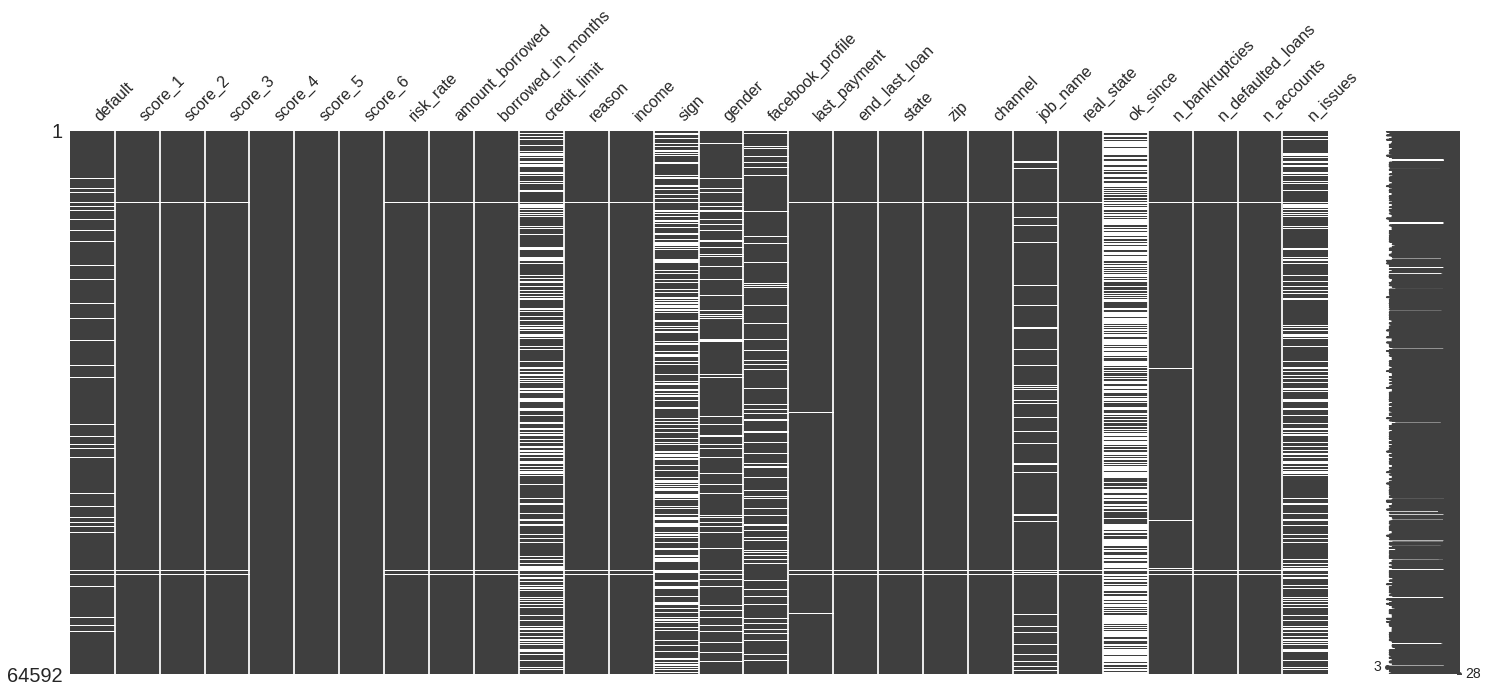

In [50]:
## First of all, let us check for missing data points
msno.matrix(raw_data)

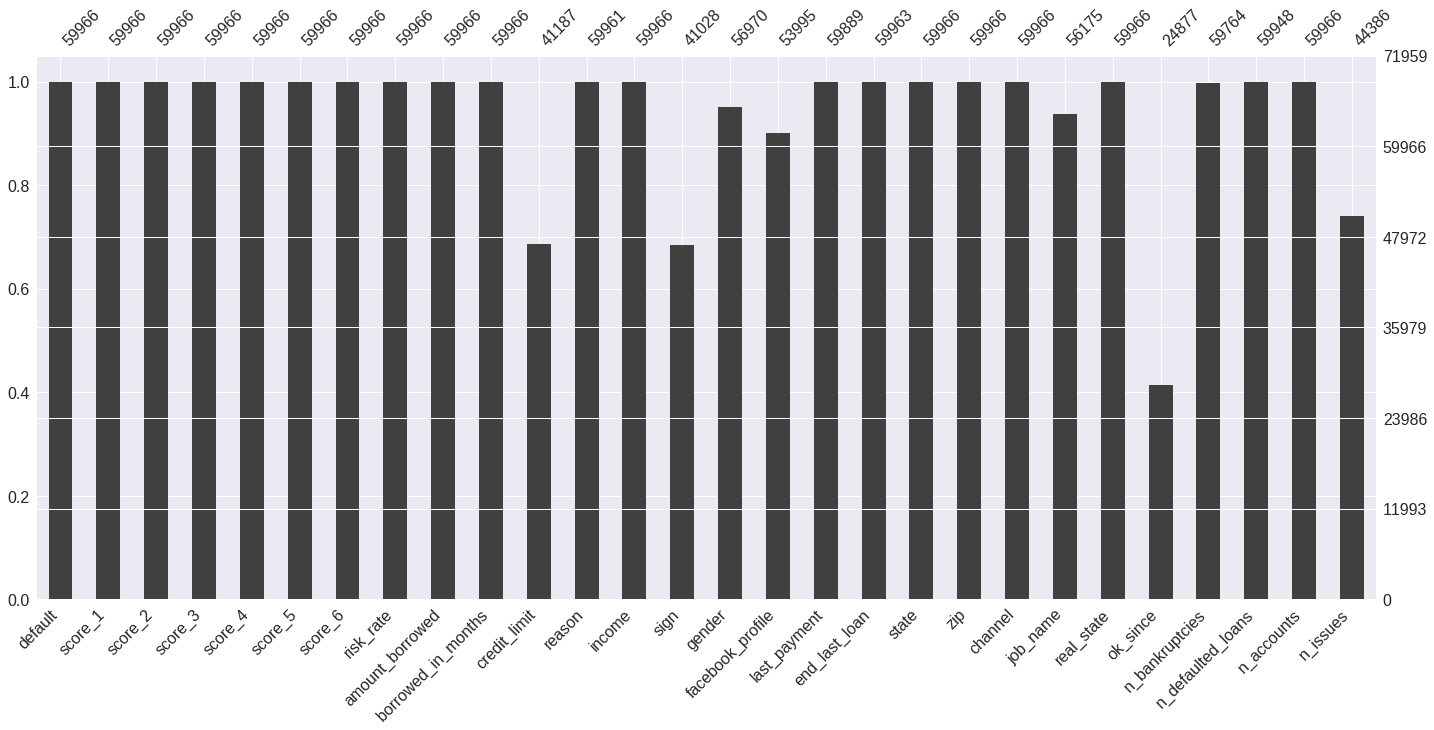

In [51]:
## Since the dependent variables has some missing values, we start out by dropping these observations out
raw_data = raw_data[~raw_data["default"].isnull()]
## Plot the missing data map again
msno.bar(raw_data)

In [52]:
## We can see that the ok_since column is thinly populated, so we drop it
raw_data.drop("ok_since", 1, inplace=True)

In [91]:
## We have some variables that are continous, we will first separate them out
continuous = raw_data.select_dtypes(include=['float64'])
print(continuous.shape)
continuous.head()

(59966, 13)


,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
ids,,,,,,,,,,,,,
810e3277-619e-3154-7ba0-ebddfc5f7ea9,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,1.0,0.0,9.0,9.0
b4118fd5-77d5-4d80-3617-bacd7aaf1a88,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,NaN,46016.31,0.0,0.0,3.0,NaN
a75638f1-4662-4f4f-044a-d649b676d85d,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,NaN,48025.47,0.0,0.0,5.0,NaN
285ce334-3602-42b3-51cb-eebfcba48a09,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,NaN,46011.12,0.0,0.0,5.0,NaN
e643bf65-9288-92f2-df13-eed631fe237c,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,0.0,0.0,10.0,10.0


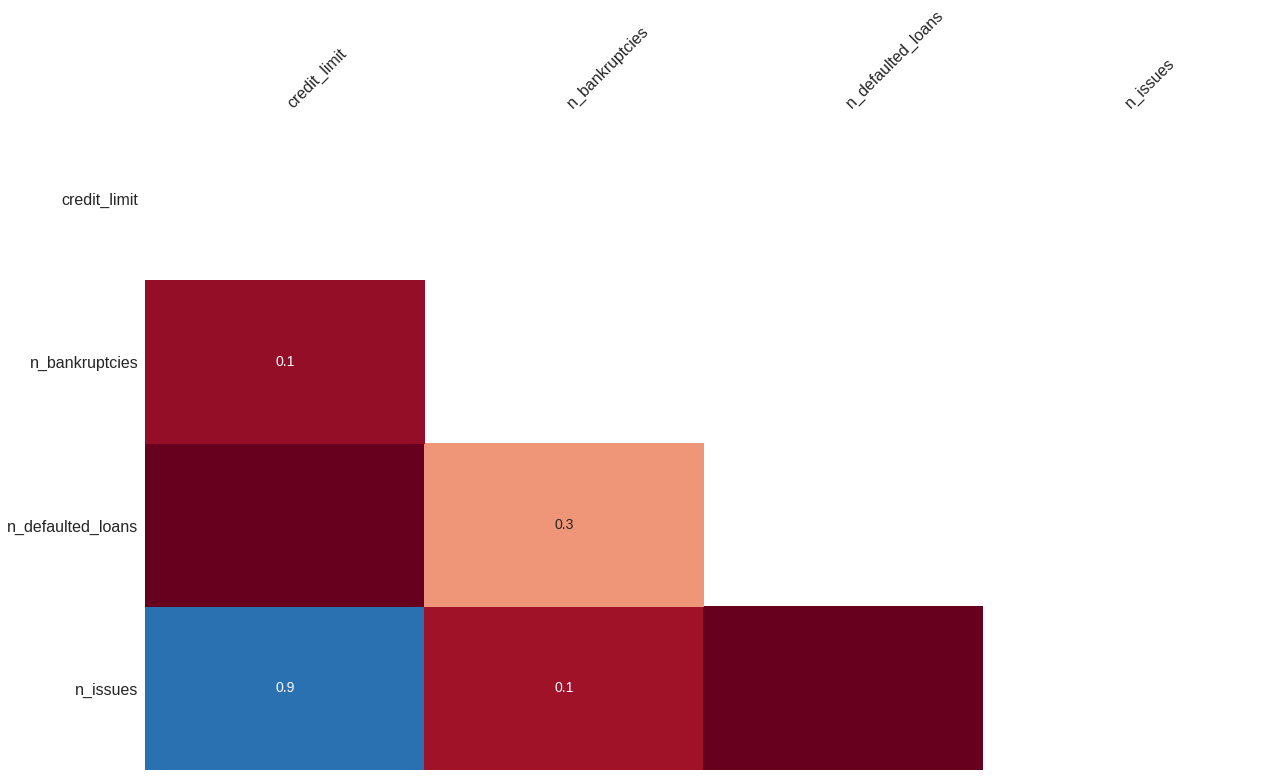

In [92]:
## Now, lets check for correlations among the continuous variables
msno.heatmap(continuous)

In [89]:
# continuous.dropna(inplace=True)
# selector = VarianceThreshold()
# x = selector.fit_transform(continuous)
# pd.DataFrame(x).head()


In [79]:
continuous.head()

,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
ids,,,,,,,,,,,,,
810e3277-619e-3154-7ba0-ebddfc5f7ea9,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,1.0,0.0,9.0,9.0
e643bf65-9288-92f2-df13-eed631fe237c,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,0.0,0.0,10.0,10.0
8a66ed52-97b1-967f-132c-a5035c130d74,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,0.0,0.0,10.0,10.0
b8de2a5e-47b2-c03d-7997-0a85d402f9c2,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,0.0,0.0,13.0,13.0
63ada984-e40a-85f5-1cef-c708be59ef93,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,0.0,0.0,6.0,6.0


In [16]:
raw_data.columns

Index(['default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'reason', 'income', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues'],
      dtype='object')

In [58]:
raw_data.dtypes

default                object
score_1                object
score_2                object
score_3               float64
score_4               float64
score_5               float64
score_6               float64
risk_rate             float64
amount_borrowed       float64
borrowed_in_months    float64
credit_limit          float64
reason                 object
income                float64
sign                   object
gender                 object
facebook_profile       object
last_payment           object
end_last_loan          object
state                  object
zip                    object
channel                object
job_name               object
real_state             object
n_bankruptcies        float64
n_defaulted_loans     float64
n_accounts            float64
n_issues              float64
dtype: object

In [6]:
raw_data.describe()

,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
count,63807.000000,64592.000000,64592.000000,64592.000000,63807.000000,63807.000000,63807.000000,44839.000000,6.380700e+04,26554.000000,63605.000000,63789.000000,63807.000000,48141.000000
mean,348.031877,99.997870,0.499220,99.942719,0.296404,13853.282850,41.835347,34562.007560,7.180972e+04,35.174249,0.076959,0.004703,10.681164,11.044847
std,110.064626,3.170869,0.288769,10.034220,0.101549,8105.662643,10.295568,37041.867093,5.124993e+04,21.663679,0.277000,0.079048,4.583902,4.576030
min,0.000000,86.191572,0.000035,60.663039,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,97.858659,0.250295,93.210322,0.220000,7762.945000,36.000000,10000.000000,4.501336e+04,17.000000,0.000000,0.000000,7.000000,8.000000
50%,340.000000,100.006042,0.498237,99.975654,0.290000,12023.680000,36.000000,25775.000000,6.139916e+04,32.000000,0.000000,0.000000,10.000000,10.000000
75%,420.000000,102.131648,0.749190,106.698884,0.360000,19384.815000,36.000000,47326.500000,8.602645e+04,50.000000,0.000000,0.000000,13.000000,14.000000
max,990.000000,113.978234,0.999982,142.430069,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,141.000000,6.000000,5.000000,49.000000,49.000000


In [56]:
raw_data.apply(lambda x: len(set(x)))

default                   2
score_1                   7
score_2                  35
score_3                  87
score_4               59966
score_5               59966
score_6               59966
risk_rate                81
amount_borrowed       50484
borrowed_in_months        2
credit_limit          45017
reason                19497
income                54273
sign                     13
gender                    3
facebook_profile          3
last_payment            109
end_last_loan           111
state                    50
zip                     830
channel                   1
job_name              42264
real_state                5
n_bankruptcies          209
n_defaulted_loans        23
n_accounts               45
n_issues              15625
dtype: int64

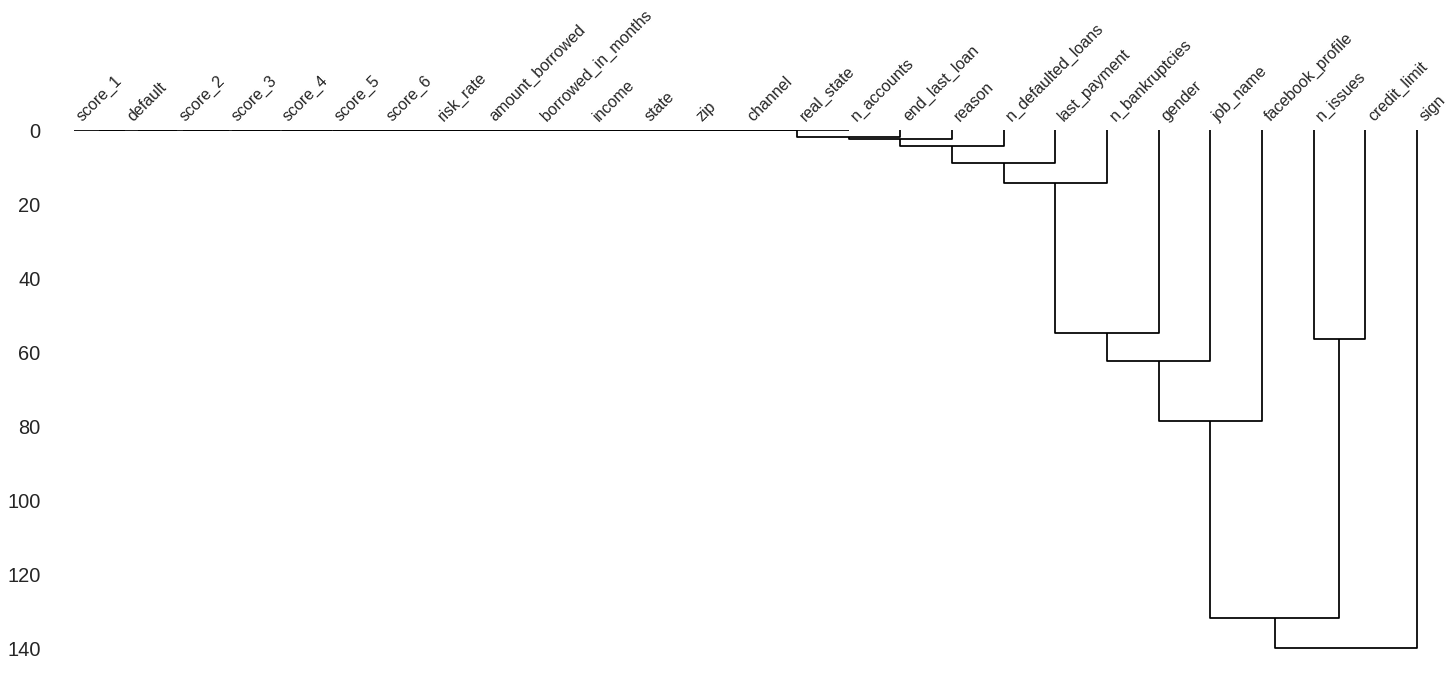

In [63]:
msno.dendrogram(raw_data)

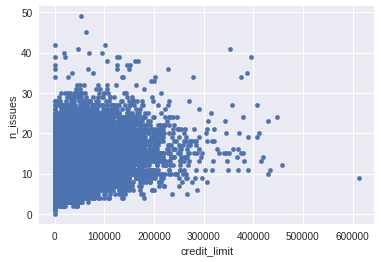

In [70]:
raw_data.plot.scatter('credit_limit', 'n_issues')

ValueError: could not convert string to float: 'N5/CE7lSkAfB04hVFFwllw=='